In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
# Importing the dataset
data = pd.read_csv("Employee-Attrition.csv")

In [34]:
# Printing the 1st 5 columns
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
# Printing the dimenions of data
data.shape

(1470, 35)

In [36]:
# Viewing the column heading
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
# Inspecting the target variable
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [38]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [39]:
# Identifying the unique number of values in the dataset
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [40]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [41]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [42]:
# Viewing the data statistics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [43]:
# Here the value for columns, Over18, StandardHours and EmployeeCount are same for all rows, we can eliminate these columns.
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)

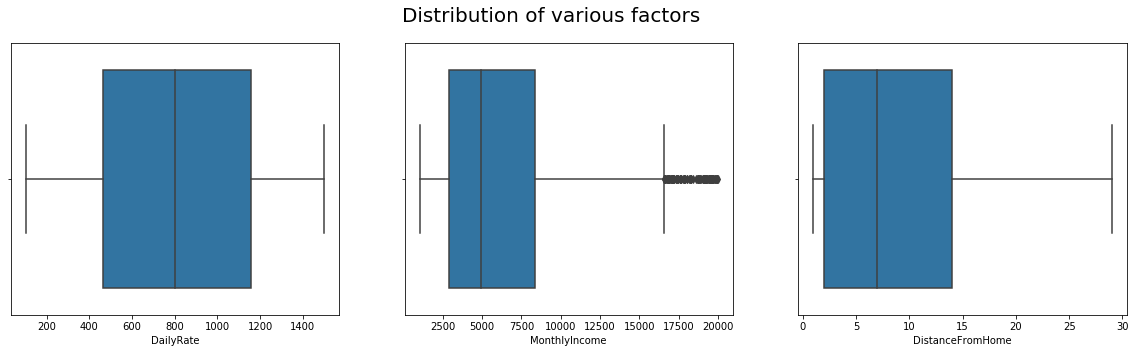

In [44]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(1,3, figsize=(20,5))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.boxplot(data['DailyRate'], ax = ax[0]) 
sns.boxplot(data['MonthlyIncome'], ax = ax[1]) 
sns.boxplot(data['DistanceFromHome'], ax = ax[2])  
plt.show()

In [45]:
corr = data.corr()
corr.shape

(23, 23)

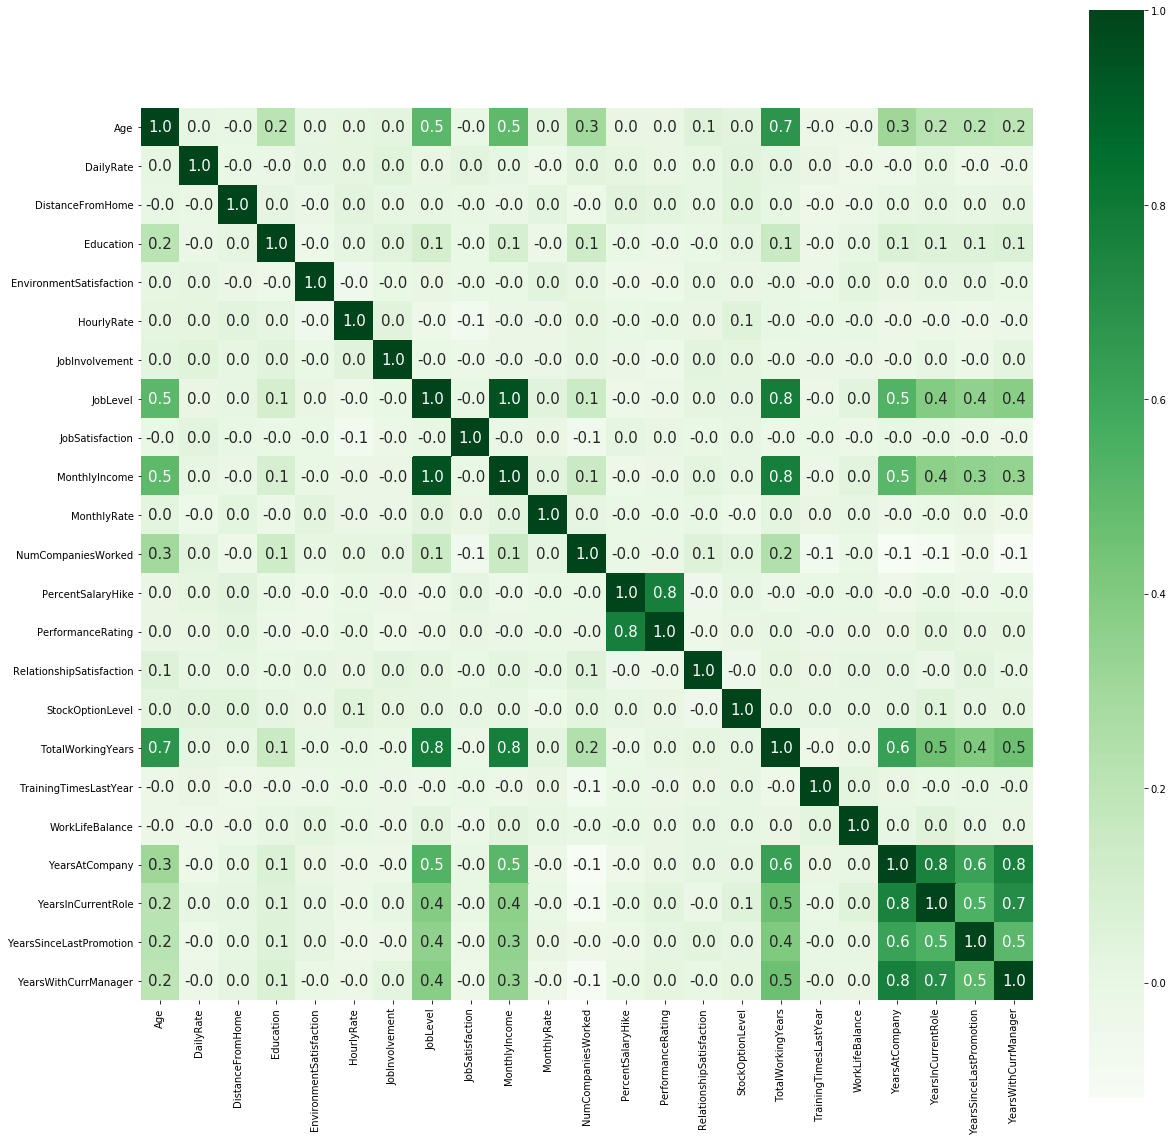

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

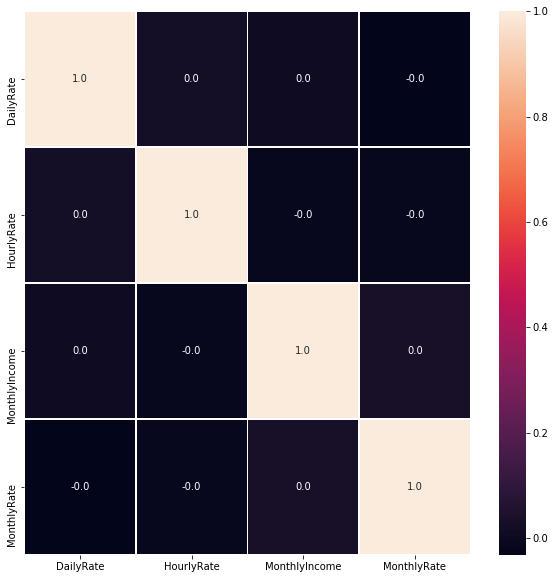

In [47]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

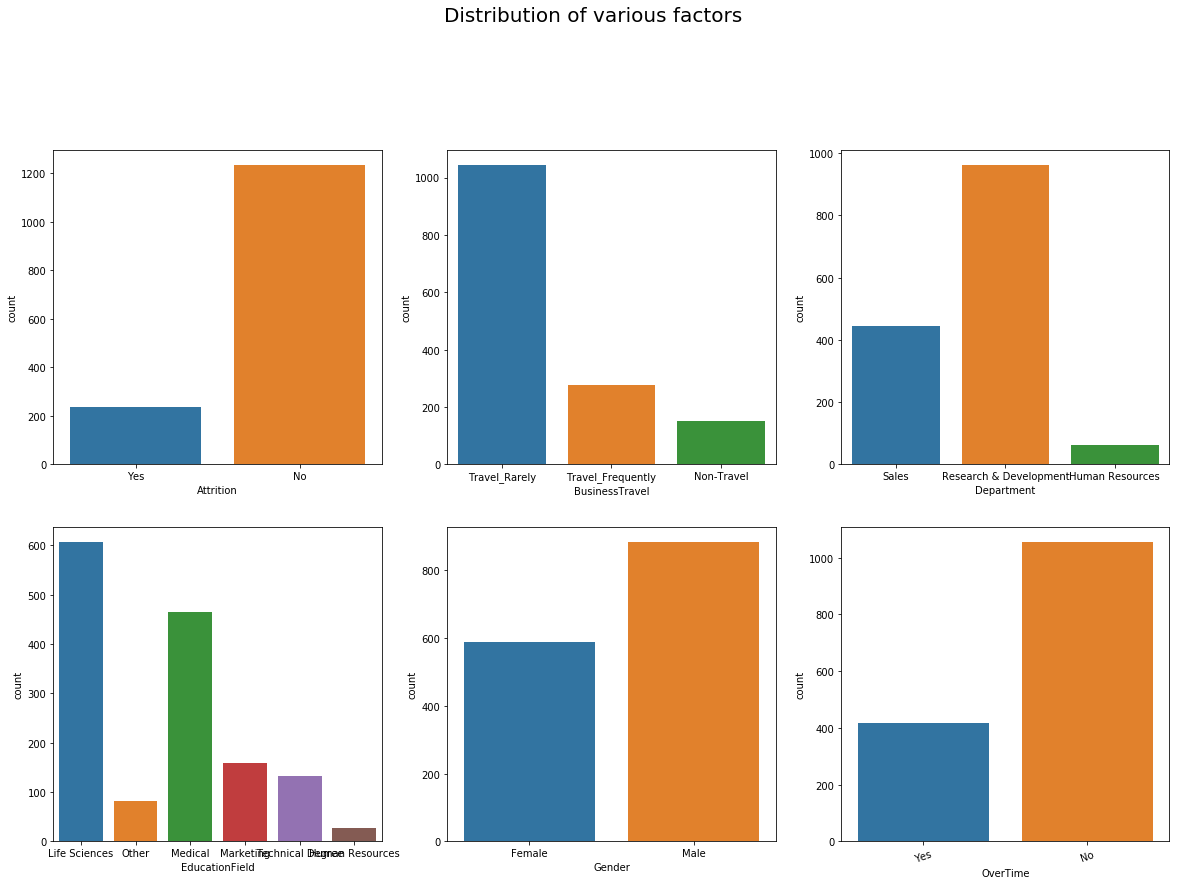

In [48]:
# Plotting countplots for the categorical variables
fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(data['Attrition'], ax = ax[0,0]) 
sns.countplot(data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(data['Department'], ax = ax[0,2]) 
sns.countplot(data['EducationField'], ax = ax[1,0])
sns.countplot(data['Gender'], ax = ax[1,1])  
sns.countplot(data['OverTime'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

In [49]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(data['JobRole'], data['Attrition'], margins=True)
JobRoleCrossTab

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [50]:
JobRoleCrossTab.div(JobRoleCrossTab["All"], axis=0)

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,0.931298,0.068702,1.0
Human Resources,0.769231,0.230769,1.0
Laboratory Technician,0.760618,0.239382,1.0
Manager,0.950980,0.049020,1.0
Manufacturing Director,0.931034,0.068966,1.0
Research Director,0.975000,0.025000,1.0
Research Scientist,0.839041,0.160959,1.0
Sales Executive,0.825153,0.174847,1.0
Sales Representative,0.602410,0.397590,1.0


In [51]:
# Combining job roles with high similarities together
data['JobRole'].replace(['Human Resources','Laboratory Technician'],value= 'HR-LT',inplace = True)
data['JobRole'].replace(['Research Scientist','Sales Executive'],value= 'RS-SE',inplace = True)
data['JobRole'].replace(['Healthcare Representative','Manufacturing Director'],value= 'HE-MD',inplace = True)

In [52]:
# Encoding Yes / No values in Attrition column to 1 / 0
data.Attrition.replace(["Yes","No"],[1,0],inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
